In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
train_seq_path = '/kaggle/input/stanford-rna-3d-folding/train_sequences.csv'
train_lab_path = '/kaggle/input/stanford-rna-3d-folding/train_labels.csv'
val_seq_path = '/kaggle/input/stanford-rna-3d-folding/validation_sequences.csv'
val_lab_path = '/kaggle/input/stanford-rna-3d-folding/validation_labels.csv'
test_seq_path = '/kaggle/input/stanford-rna-3d-folding/test_sequences.csv'
sample_sub_path = '/kaggle/input/stanford-rna-3d-folding/sample_submission.csv'

In [4]:
train_seq = pd.read_csv(train_seq_path)
train_lab = pd.read_csv(train_lab_path)
val_seq = pd.read_csv(val_seq_path)
val_lab = pd.read_csv(val_lab_path)
test_seq = pd.read_csv(test_seq_path)
sample_sub = pd.read_csv(sample_sub_path)

In [5]:
train_seq.tail()

,target_id,sequence,temporal_cutoff,description,all_sequences
839,8T3E_EC,AAACUCCAUGUAUUGGUUACCCAUCUGCAUCGAAAACUCUCCGAAC...,2024-12-11,Hypomethylated yeast 80S bound with Taura synd...,>8T3E_1|Chain A[auth BA]|40S ribosomal protein...
840,8T3F_EC,AAACUCCAUGUAUUGGUUACCCAUCUGCAUCGAAAACUCUCCGAAC...,2024-12-11,Hypomethylated yeast 80S bound with Taura synd...,>8T3F_1|Chain A[auth BA]|40S ribosomal protein...
841,8XCC_B,GUGCUGCUGUCUCCCAGACGGGAGGCAGAACUGCACCUUCCAUCAG...,2024-12-11,"Cryo-EM structure of Cas12j19 (E100K), crRNA a...",>8XCC_1|Chain A|Cas12j19(E100K)|unclassified s...
842,8Z1G_T,GGUAAAAUGGCUGAGUGAAGCAUUGGACUGUAAAUCUAAAGACAGG...,2024-12-18,Cryo-EM structure of human ELAC2-pre-tRNA,>8Z1G_1|Chain A[auth T]|Homo sapiens mitochond...
843,8Z1F_T,GGUAAAAUGGCUGAGUGAAGCAUUGGACUGUAAAUCUAAAGACAGG...,2024-12-18,Cryo-EM structure of human ELAC2-tRNA,>8Z1F_1|Chain A[auth T]|Homo sapiens mitochond...


In [6]:
train_lab.tail()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,ID,resname,resid,x_1,y_1,z_1
137090,8Z1F_T_82,U,82,NaN,NaN,NaN
137091,8Z1F_T_83,C,83,NaN,NaN,NaN
137092,8Z1F_T_84,A,84,NaN,NaN,NaN
137093,8Z1F_T_85,U,85,NaN,NaN,NaN
137094,8Z1F_T_86,A,86,NaN,NaN,NaN


In [7]:
train_lab.isnull().sum()
train_lab = train_lab.dropna()
train_lab.tail()

,ID,resname,resid,x_1,y_1,z_1
137070,8Z1F_T_62,U,62,112.516998,117.880997,119.245003
137071,8Z1F_T_63,A,63,115.292999,116.571999,114.827003
137072,8Z1F_T_64,C,64,115.857002,114.595001,109.509003
137073,8Z1F_T_65,C,65,113.816002,113.236000,104.339996
137074,8Z1F_T_66,A,66,118.279999,113.883003,98.071999


In [8]:
coordinates = ['x_1','y_1','z_1']
train_lab[train_lab[coordinates] == -1e18].count()

ID         0
resname    0
resid      0
x_1        0
y_1        0
z_1        0
dtype: int64

In [9]:
val_seq.tail()

,target_id,sequence,temporal_cutoff,description,all_sequences
7,R1138,GGGAGAGUACUAUUCAGAUGCAGACCGCAAGUUCAGAGCGGUUUGC...,2022-06-24,6HBC-Young\nAdditional Information: Thi...,>7PTK_1|Chain A[auth B]|RNA|synthetic construc...
8,R1149,GGACACGAGUAACUCGUCUAUCUUCUGCAGGCUGCUUACGGUUUCG...,2022-07-02,SARS-CoV-2 SL5\nAdditional Information: ...,>8UYS_1|Chain A|SARS-CoV-2 RNA SL5 domain.|Sev...
9,R1156,GGAGCAUCGUGUCUCAAGUGCUUCACGGUCACAAUAUACCGUUUCG...,2022-07-07,BtCoV-HKU5 SL5\nBtCoV-HKU5 5 proximal stem-loo...,>8UYE_1|Chain A|BtCoV-HKU5 5' proximal stem-lo...
10,R1189,GCGUACAGGGAACACGCAACCCCGAAGGAUCGGGGAAGGGACGUCG...,2022-08-11,A-6B\nAdditional Information: The T1189...,">7YR7_1|Chains A[auth B], B[auth C], C[auth D]..."
11,R1190,GCGUACAGGGAACACGCAACCCCGAAGGAUCGGGGAAGGGACGUCG...,2022-08-11,A-4B\nAdditional Information: The T1189...,">7YR6_1|Chains A[auth B], B[auth C], C[auth D]..."


In [10]:
val_lab.tail()

,ID,resname,resid,x_1,y_1,z_1,x_2,y_2,z_2,x_3,...,z_37,x_38,y_38,z_38,x_39,y_39,z_39,x_40,y_40,z_40
2510,R1190_114,U,114,87.870003,105.432999,115.183998,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18
2511,R1190_115,U,115,92.911003,105.394997,113.741997,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18
2512,R1190_116,U,116,99.012001,105.749001,113.073997,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18
2513,R1190_117,U,117,103.861000,103.453003,114.589996,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18
2514,R1190_118,U,118,106.745003,95.313004,112.320999,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18


In [11]:
coordinates = [f'{axis}_{n}' for n in range(1, 41) for axis in ['x', 'y', 'z']]
val_lab[val_lab[coordinates] == -1e18].count()

ID            0
resname       0
resid         0
x_1          15
y_1          15
           ... 
y_39       2380
z_39       2380
x_40       2380
y_40       2380
z_40       2380
Length: 123, dtype: int64

<Axes: >

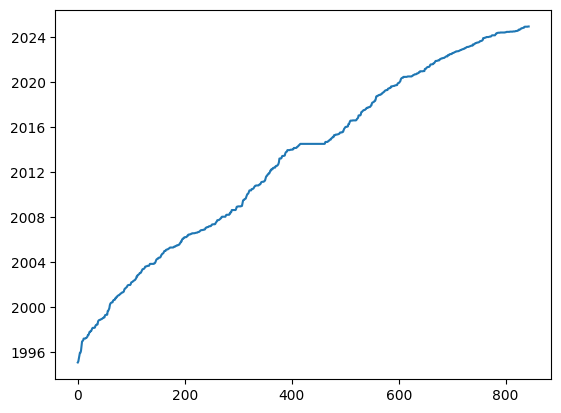

In [12]:
train_seq['temporal_cutoff'] = pd.to_datetime(train_seq['temporal_cutoff'])
train_seq['temporal_cutoff'].plot()

In [13]:
filtered_seq = train_seq[train_seq['temporal_cutoff'] < '2022-05-27']
filtered_seq

,target_id,sequence,temporal_cutoff,description,all_sequences
0,1SCL_A,GGGUGCUCAGUACGAGAGGAACCGCACCC,1995-01-26,"THE SARCIN-RICIN LOOP, A MODULAR RNA",>1SCL_1|Chain A|RNA SARCIN-RICIN LOOP|Rattus n...
1,1RNK_A,GGCGCAGUGGGCUAGCGCCACUCAAAAGGCCCAU,1995-02-27,THE STRUCTURE OF AN RNA PSEUDOKNOT THAT CAUSES...,>1RNK_1|Chain A|RNA PSEUDOKNOT|null\nGGCGCAGUG...
2,1RHT_A,GGGACUGACGAUCACGCAGUCUAU,1995-06-03,24-MER RNA HAIRPIN COAT PROTEIN BINDING SITE F...,>1RHT_1|Chain A|RNA (5'-R(P*GP*GP*GP*AP*CP*UP*...
3,1HLX_A,GGGAUAACUUCGGUUGUCCC,1995-09-15,P1 HELIX NUCLEIC ACIDS (DNA/RNA) RIBONUCLEIC ACID,>1HLX_1|Chain A|RNA (5'-R(*GP*GP*GP*AP*UP*AP*A...
4,1HMH_E,GGCGACCCUGAUGAGGCCGAAAGGCCGAAACCGU,1995-12-07,THREE-DIMENSIONAL STRUCTURE OF A HAMMERHEAD RI...,">1HMH_1|Chains A, C, E|HAMMERHEAD RIBOZYME-RNA..."
...,...,...,...,...,...
687,7SLP_R,XGAUGUGAGGGCGACUUCGGUCCUCCCUCACCGCUCCAUGUGCGAA...,2022-03-30,Cryo-EM structure of 7SK core RNP with linear RNA,>7SLP_1|Chain A|7SK snRNA methylphosphate capp...
688,7UGA_A,GGGUGUAGAAAAGUAAGGGAAACUCAAACCCCUUUCUACACCC,2022-04-13,Solution structure of NPSL2,>7UGA_1|Chain A|NPSL2 RNA (43-MER)|Homo sapien...
689,7S36_R,GGCUGCGUAUUUCUACUCUGUUGUUUUAGAGCUAGAAAUAGCAAGU...,2022-04-20,Cas9:sgRNA:DNA (S. pyogenes) with 0 RNA:DNA ba...,>7S36_1|Chain A[auth N]|Non-target DNA strand|...
690,7S38_R,GGCUGCGUAUUUCUACUCUCAAGUUUUAGAGCUAGAAAUAGCAAGU...,2022-04-20,Cas9:sgRNA:DNA (S. pyogenes) forming a 3-base-...,>7S38_1|Chain A[auth N]|Non-target DNA strand|...


In [37]:
# Count nucleotides
all_sequences = filtered_seq['sequence'].tolist()
nucleotide_counts = Counter("".join(all_sequences))
print(nucleotide_counts)

Counter({'G': 35131, 'C': 28369, 'A': 26778, 'U': 23333, '-': 4, 'X': 1})


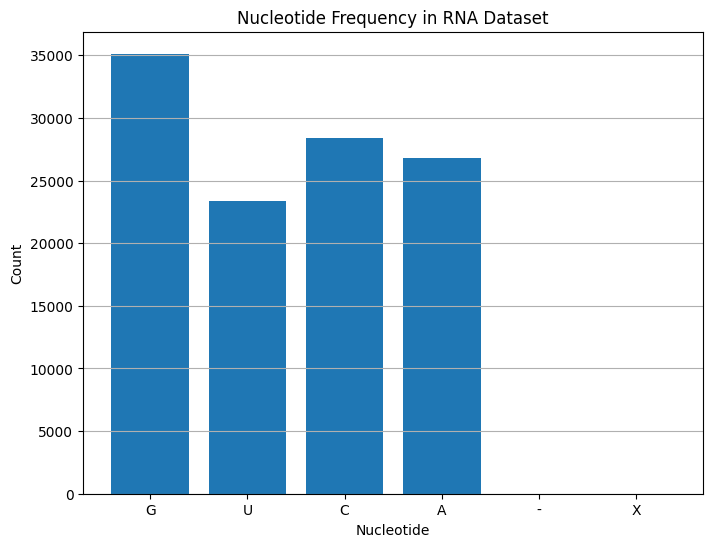

In [42]:
# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(nucleotide_counts.keys(), nucleotide_counts.values())

plt.title("Nucleotide Frequency in RNA Dataset")
plt.xlabel("Nucleotide")
plt.ylabel("Count")
plt.grid(axis='y')

plt.show()

What are the '-' and 'X'?

As far as I know, there no such thing in RNA sequence.

In [14]:
#combine two datasets with columns of sequences and resnames
train_lab_copy = train_lab.copy()
train_lab_copy['target_id'] = train_lab_copy['ID'].str.extract(r'(.*)_\d+')
train_merged = pd.merge(train_lab_copy, filtered_seq, on='target_id', how='inner')
train_merged

,ID,resname,resid,x_1,y_1,z_1,target_id,sequence,temporal_cutoff,description,all_sequences
0,1SCL_A_1,G,1,13.760000,-25.974001,0.102000,1SCL_A,GGGUGCUCAGUACGAGAGGAACCGCACCC,1995-01-26,"THE SARCIN-RICIN LOOP, A MODULAR RNA",>1SCL_1|Chain A|RNA SARCIN-RICIN LOOP|Rattus n...
1,1SCL_A_2,G,2,9.310000,-29.638000,2.669000,1SCL_A,GGGUGCUCAGUACGAGAGGAACCGCACCC,1995-01-26,"THE SARCIN-RICIN LOOP, A MODULAR RNA",>1SCL_1|Chain A|RNA SARCIN-RICIN LOOP|Rattus n...
2,1SCL_A_3,G,3,5.529000,-27.813000,5.878000,1SCL_A,GGGUGCUCAGUACGAGAGGAACCGCACCC,1995-01-26,"THE SARCIN-RICIN LOOP, A MODULAR RNA",>1SCL_1|Chain A|RNA SARCIN-RICIN LOOP|Rattus n...
3,1SCL_A_4,U,4,2.678000,-24.900999,9.793000,1SCL_A,GGGUGCUCAGUACGAGAGGAACCGCACCC,1995-01-26,"THE SARCIN-RICIN LOOP, A MODULAR RNA",>1SCL_1|Chain A|RNA SARCIN-RICIN LOOP|Rattus n...
4,1SCL_A_5,G,5,1.827000,-20.136000,11.793000,1SCL_A,GGGUGCUCAGUACGAGAGGAACCGCACCC,1995-01-26,"THE SARCIN-RICIN LOOP, A MODULAR RNA",>1SCL_1|Chain A|RNA SARCIN-RICIN LOOP|Rattus n...
...,...,...,...,...,...,...,...,...,...,...,...
108812,7S3H_R_95,G,95,106.685997,135.809998,175.824997,7S3H_R,GGCUGCGUAUUUCUACUCUGUUGUUUUAGAGCUAGAAAUAGCAAGU...,2022-04-20,Cas9:sgRNA:DNA (S. pyogenes) with 0 RNA:DNA ba...,>7S3H_1|Chain A[auth N]|Non-target DNA strand|...
108813,7S3H_R_96,U,96,101.281998,135.630997,176.580002,7S3H_R,GGCUGCGUAUUUCUACUCUGUUGUUUUAGAGCUAGAAAUAGCAAGU...,2022-04-20,Cas9:sgRNA:DNA (S. pyogenes) with 0 RNA:DNA ba...,>7S3H_1|Chain A[auth N]|Non-target DNA strand|...
108814,7S3H_R_97,G,97,96.080002,134.977997,174.792999,7S3H_R,GGCUGCGUAUUUCUACUCUGUUGUUUUAGAGCUAGAAAUAGCAAGU...,2022-04-20,Cas9:sgRNA:DNA (S. pyogenes) with 0 RNA:DNA ba...,>7S3H_1|Chain A[auth N]|Non-target DNA strand|...
108815,7S3H_R_98,C,98,93.161003,132.787994,171.001999,7S3H_R,GGCUGCGUAUUUCUACUCUGUUGUUUUAGAGCUAGAAAUAGCAAGU...,2022-04-20,Cas9:sgRNA:DNA (S. pyogenes) with 0 RNA:DNA ba...,>7S3H_1|Chain A[auth N]|Non-target DNA strand|...


In [15]:
sample_sub.head()

,ID,resname,resid,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5
0,R1107_1,G,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,R1107_2,G,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,R1107_3,G,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,R1107_4,G,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,R1107_5,G,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


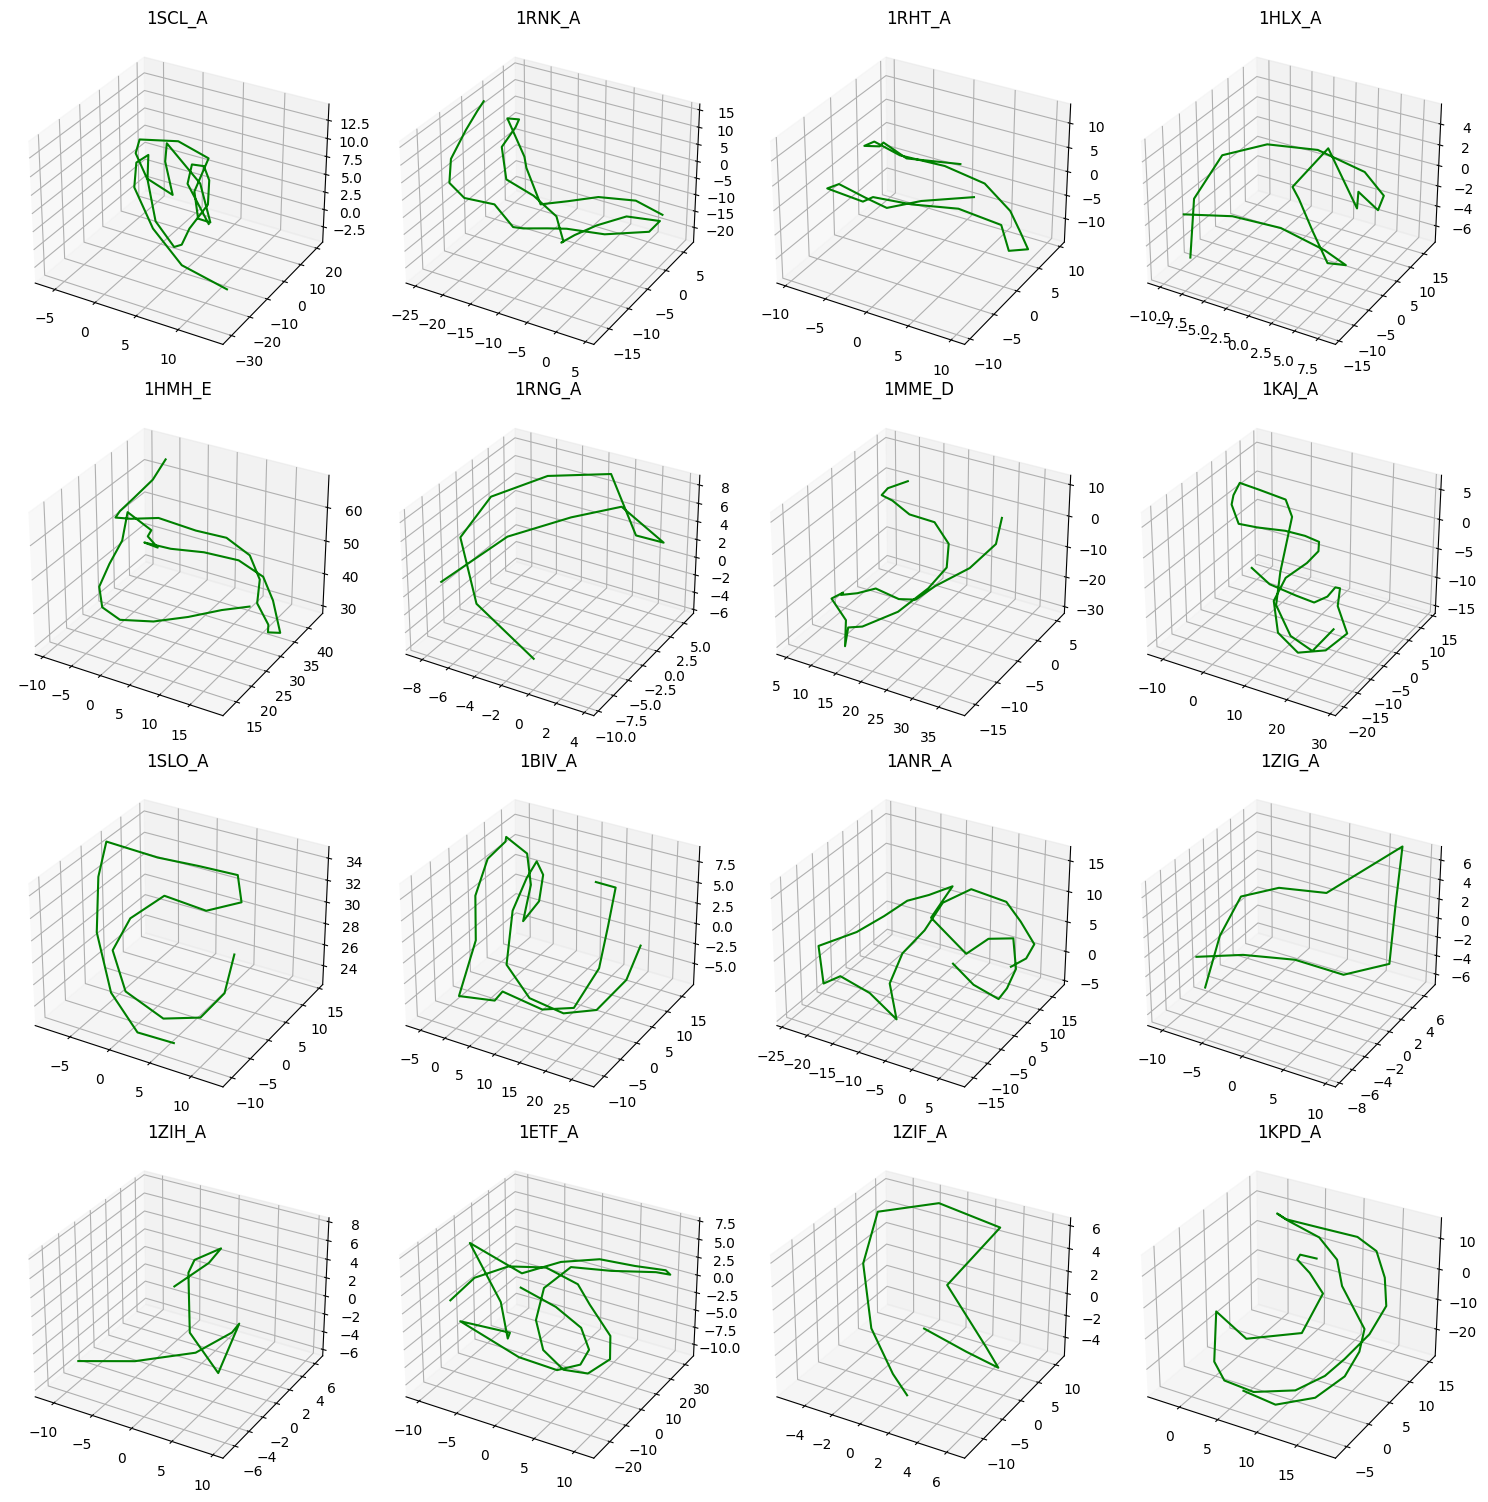

In [16]:
train_merged_RNAs = list(train_merged['target_id'].unique())
rows = 4
cols = 4
fig, ax = plt.subplots(rows, cols, figsize=(15, 15), subplot_kw={'projection': '3d'})

for i in range(rows):
    for j, RNA in enumerate(train_merged_RNAs[(cols * i) : cols*(i + 1)]):
        extracted_RNA = train_merged[train_merged['target_id'] == RNA]
        ax[i][j].plot3D(extracted_RNA['x_1'], extracted_RNA['y_1'], extracted_RNA['z_1'], 'green')
        ax[i][j].set_title(RNA)

plt.tight_layout()
plt.show()

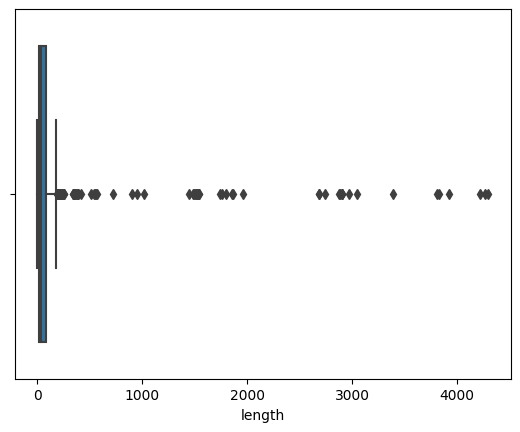

In [17]:
train_seq['length'] = train_seq['sequence'].str.len()
sns.boxplot(x='length', data=train_seq)
plt.show()

In [18]:
RNA = train_seq.loc[train_seq['length'] >= 4298]
RNA = list(RNA['target_id'])
RNA

['4V6X_A5']

Text(0.5, 0.92, "['4V6X_A5']")

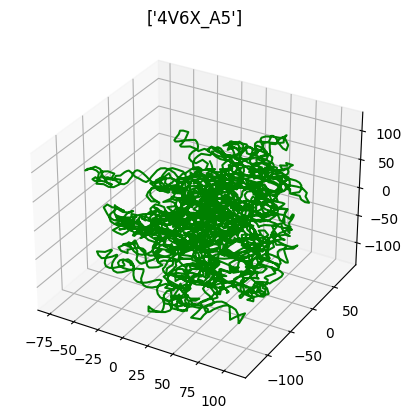

In [19]:
extracted_RNA = train_merged[train_merged['target_id'] == '4V6X_A5']
ax = plt.axes (projection = '3d')
ax.plot3D(extracted_RNA['x_1'], extracted_RNA['y_1'], extracted_RNA['z_1'], 'green')
ax.set_title(RNA)

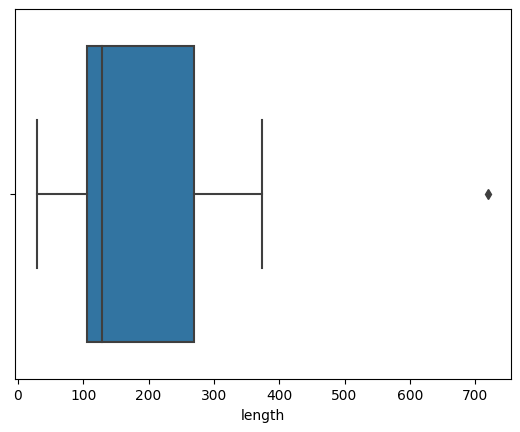

In [20]:
test_seq['length'] = test_seq['sequence'].str.len()
sns.boxplot(x='length', data=test_seq)
plt.show()

In [21]:
val_lab_copy = val_lab.copy()
val_lab_copy['target_id'] = val_lab_copy['ID'].str.extract(r'(.*)_\d+')
val_merged = pd.merge(val_lab_copy, val_seq, on='target_id', how='inner')
val_merged

,ID,resname,resid,x_1,y_1,z_1,x_2,y_2,z_2,x_3,...,y_39,z_39,x_40,y_40,z_40,target_id,sequence,temporal_cutoff,description,all_sequences
0,R1107_1,G,1,-5.499000,8.520000,8.605000,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,R1107,GGGGGCCACAGCAGAAGCGUUCACGUCGCAGCCCCUGUCAGCCAUU...,2022-05-28,CPEB3 ribozyme\nHuman\nhuman CPEB3 HDV-like ri...,>7QR4_1|Chain A|U1 small nuclear ribonucleopro...
1,R1107_2,G,2,-5.826000,10.453000,14.010000,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,R1107,GGGGGCCACAGCAGAAGCGUUCACGUCGCAGCCCCUGUCAGCCAUU...,2022-05-28,CPEB3 ribozyme\nHuman\nhuman CPEB3 HDV-like ri...,>7QR4_1|Chain A|U1 small nuclear ribonucleopro...
2,R1107_3,G,3,-5.849000,14.768000,17.584999,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,R1107,GGGGGCCACAGCAGAAGCGUUCACGUCGCAGCCCCUGUCAGCCAUU...,2022-05-28,CPEB3 ribozyme\nHuman\nhuman CPEB3 HDV-like ri...,>7QR4_1|Chain A|U1 small nuclear ribonucleopro...
3,R1107_4,G,4,-5.784000,19.985001,18.666000,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,R1107,GGGGGCCACAGCAGAAGCGUUCACGUCGCAGCCCCUGUCAGCCAUU...,2022-05-28,CPEB3 ribozyme\nHuman\nhuman CPEB3 HDV-like ri...,>7QR4_1|Chain A|U1 small nuclear ribonucleopro...
4,R1107_5,G,5,-5.755000,25.533001,17.132999,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,R1107,GGGGGCCACAGCAGAAGCGUUCACGUCGCAGCCCCUGUCAGCCAUU...,2022-05-28,CPEB3 ribozyme\nHuman\nhuman CPEB3 HDV-like ri...,>7QR4_1|Chain A|U1 small nuclear ribonucleopro...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2510,R1190_114,U,114,87.870003,105.432999,115.183998,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,R1190,GCGUACAGGGAACACGCAACCCCGAAGGAUCGGGGAAGGGACGUCG...,2022-08-11,A-4B\nAdditional Information: The T1189...,">7YR6_1|Chains A[auth B], B[auth C], C[auth D]..."
2511,R1190_115,U,115,92.911003,105.394997,113.741997,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,R1190,GCGUACAGGGAACACGCAACCCCGAAGGAUCGGGGAAGGGACGUCG...,2022-08-11,A-4B\nAdditional Information: The T1189...,">7YR6_1|Chains A[auth B], B[auth C], C[auth D]..."
2512,R1190_116,U,116,99.012001,105.749001,113.073997,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,R1190,GCGUACAGGGAACACGCAACCCCGAAGGAUCGGGGAAGGGACGUCG...,2022-08-11,A-4B\nAdditional Information: The T1189...,">7YR6_1|Chains A[auth B], B[auth C], C[auth D]..."
2513,R1190_117,U,117,103.861000,103.453003,114.589996,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,R1190,GCGUACAGGGAACACGCAACCCCGAAGGAUCGGGGAAGGGACGUCG...,2022-08-11,A-4B\nAdditional Information: The T1189...,">7YR6_1|Chains A[auth B], B[auth C], C[auth D]..."


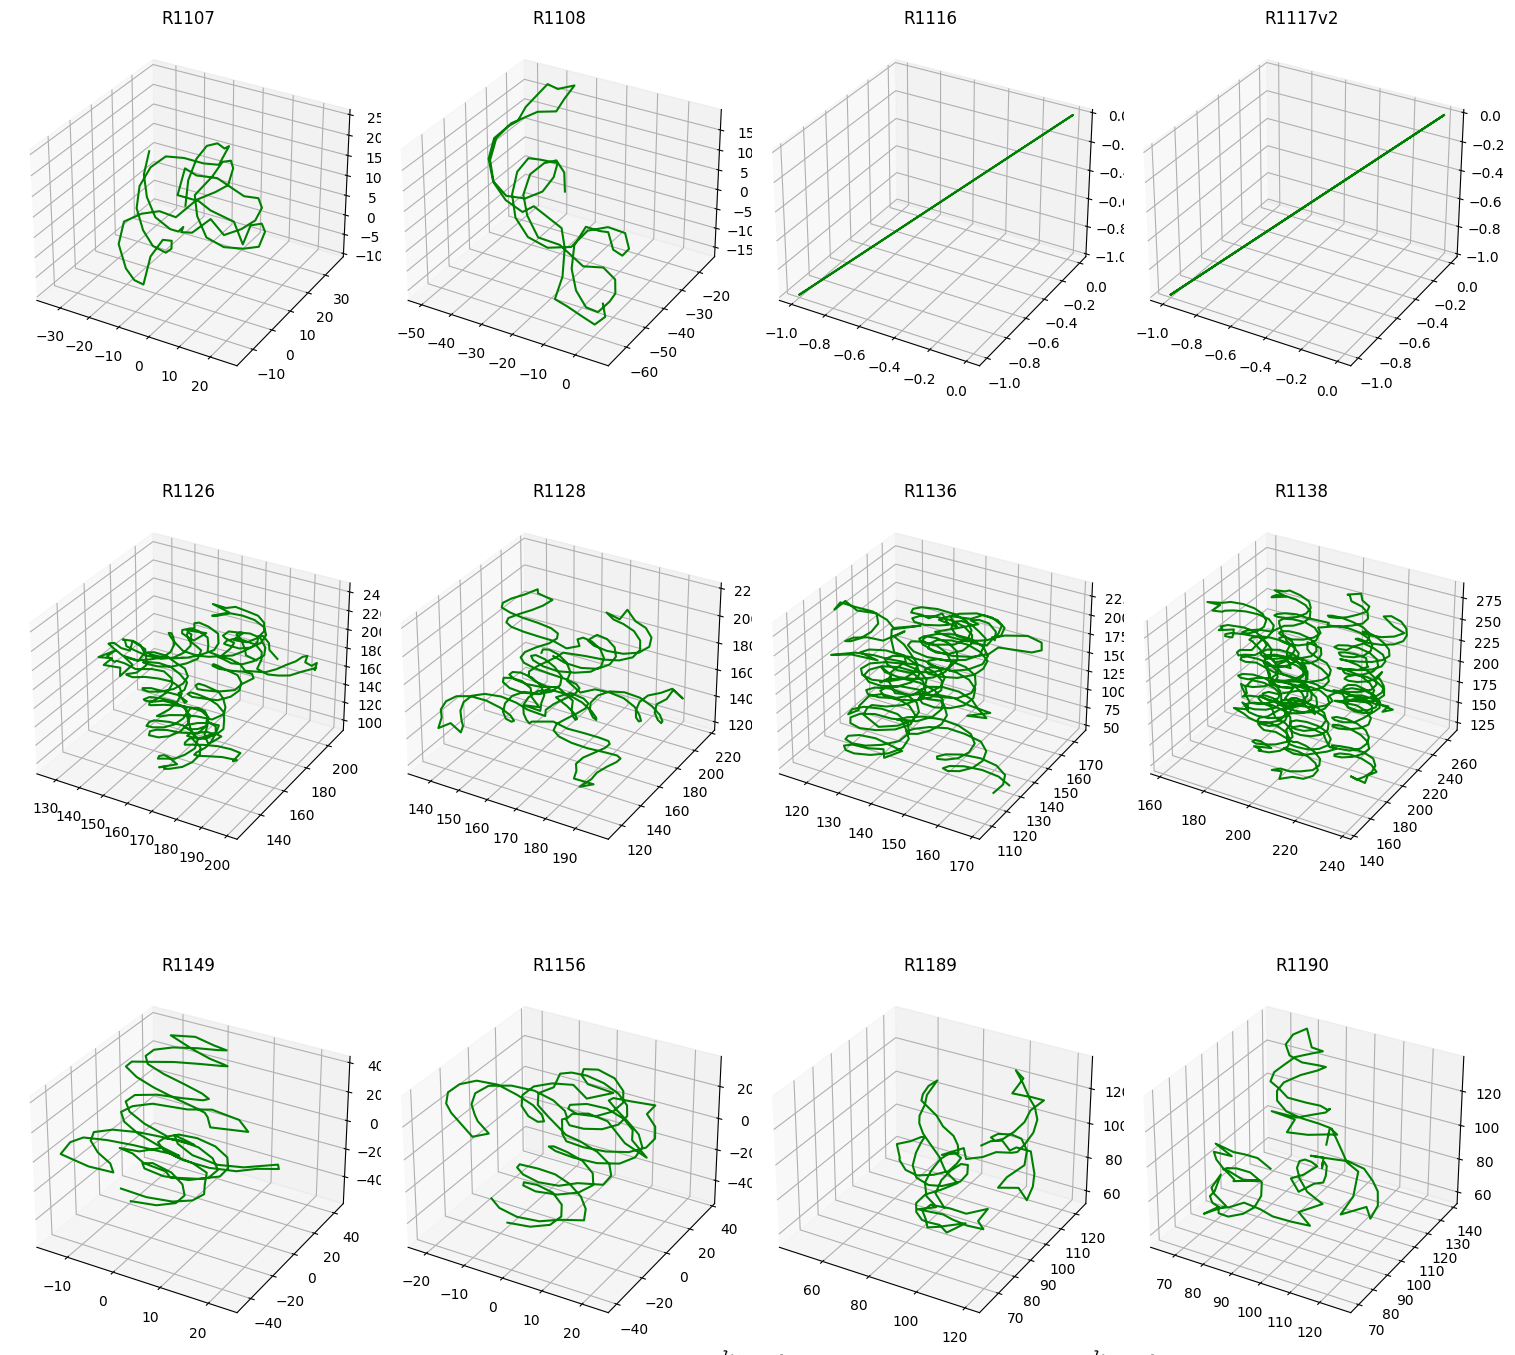

In [22]:
val_merged_RNAs = list(val_merged['target_id'].unique())
rows = 3
cols = 4
fig, ax = plt.subplots(rows, cols, figsize=(15, 15), subplot_kw={'projection': '3d'})

for i in range(rows):
    for j, RNA in enumerate(val_merged_RNAs[(cols * i) : cols*(i + 1)]):
        extracted_RNA = val_merged[val_merged['target_id'] == RNA]
        ax[i][j].plot3D(extracted_RNA['x_1'], extracted_RNA['y_1'], extracted_RNA['z_1'], 'green')
        ax[i][j].set_title(RNA)

plt.tight_layout()
plt.show()

In [23]:
val_merged[val_merged['target_id'] == 'R1117v2'].head()

,ID,resname,resid,x_1,y_1,z_1,x_2,y_2,z_2,x_3,...,y_39,z_39,x_40,y_40,z_40,target_id,sequence,temporal_cutoff,description,all_sequences
295,R1117v2_1,U,1,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,R1117v2,UUGGGUUCCCUCACCCCAAUCAUAAAAAGG,2022-06-03,PreQ1 class I type III riboswitch\nK. pneumoni...,">8FZA_1|Chains A, B|PreQ1 Riboswitch (30-MER)|..."
296,R1117v2_2,U,2,-1.257700e+01,9.519000e+00,6.405000e+00,-1.452100e+01,-1.964300e+01,7.191000e+00,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,R1117v2,UUGGGUUCCCUCACCCCAAUCAUAAAAAGG,2022-06-03,PreQ1 class I type III riboswitch\nK. pneumoni...,">8FZA_1|Chains A, B|PreQ1 Riboswitch (30-MER)|..."
297,R1117v2_3,G,3,-7.654000e+00,1.094100e+01,4.868000e+00,-1.779200e+01,-1.909100e+01,1.175400e+01,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,R1117v2,UUGGGUUCCCUCACCCCAAUCAUAAAAAGG,2022-06-03,PreQ1 class I type III riboswitch\nK. pneumoni...,">8FZA_1|Chains A, B|PreQ1 Riboswitch (30-MER)|..."
298,R1117v2_4,G,4,-2.441000e+00,1.118400e+01,5.719000e+00,-2.057800e+01,-1.561800e+01,1.419100e+01,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,R1117v2,UUGGGUUCCCUCACCCCAAUCAUAAAAAGG,2022-06-03,PreQ1 class I type III riboswitch\nK. pneumoni...,">8FZA_1|Chains A, B|PreQ1 Riboswitch (30-MER)|..."
299,R1117v2_5,G,5,2.011000e+00,1.077900e+01,8.252000e+00,-2.236800e+01,-1.069700e+01,1.586600e+01,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,R1117v2,UUGGGUUCCCUCACCCCAAUCAUAAAAAGG,2022-06-03,PreQ1 class I type III riboswitch\nK. pneumoni...,">8FZA_1|Chains A, B|PreQ1 Riboswitch (30-MER)|..."


Why R116 and R1117v2 are linear?

The coordinates of the first nueclotide of them is a large negative number, which is a placeholder.

But I want to see the structure of them.

For better GNN train, we need to mask them.

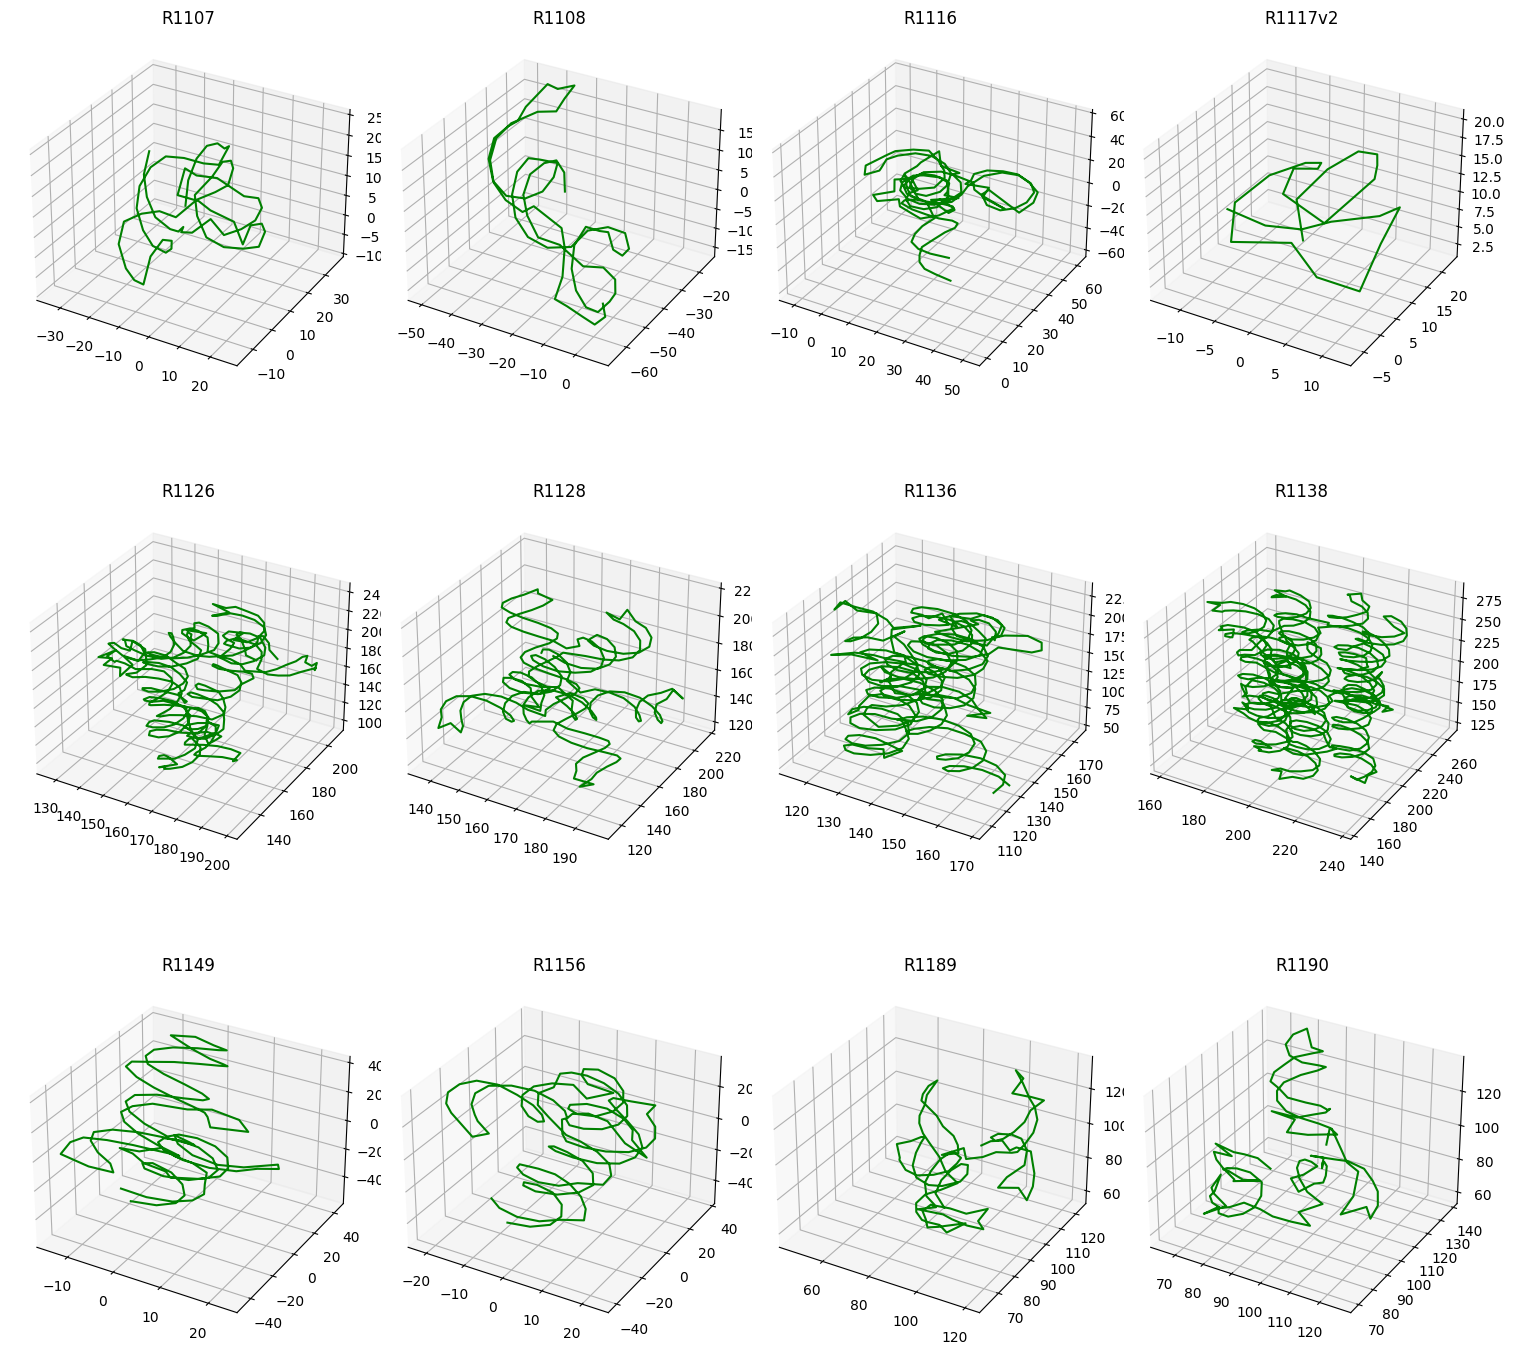

In [24]:
val_merged_RNAs = list(val_merged['target_id'].unique())
rows = 3
cols = 4
fig, ax = plt.subplots(rows, cols, figsize=(15, 15), subplot_kw={'projection': '3d'})

for i in range(rows):
    for j, RNA in enumerate(val_merged_RNAs[(cols * i) : cols*(i + 1)]):
        extracted_RNA = val_merged[val_merged['target_id'] == RNA]
        filtered_RNA = extracted_RNA[
            (extracted_RNA[['x_1', 'y_1', 'z_1']] != -1e18).all(axis=1)
        ]
        ax[i][j].plot3D(filtered_RNA['x_1'], filtered_RNA['y_1'], filtered_RNA['z_1'], 'green')
        ax[i][j].set_title(RNA)

plt.tight_layout()
plt.show()

some RNAs can be folded in more than one shape

For training, I think I can use spektral's GNN model.

Let's try then.


In [27]:
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.layers import Input, Embedding

In [30]:
#Embedding sequences


def encode_sequence(seq):
    nuc_mapping = {'A': 0, 'U': 1, 'G': 2, 'C': 3}
    return [nuc_mapping[nuc] for nuc in seq]


filtered_seq['encodedsequence'] = filtered_seq['sequence'].apply(encode_sequence)

print(filtered_seq[['sequence', 'encoded_sequence']].head())


KeyError: '-'

Can I use EGNN successfully?

Hm idk, let's try.

In [ ]:
!pip3 install egnn-pytorch torch

In [ ]:
import torch
from egnn_pytorch import EGNN

1. We need to embedding RNA sequences.
2. Explore EGNN.
3. Set features, coordinates, and edges.
4. Train the train dataset on EGNN Network.
5. Predict the test dataset.
6. Making a submission.